#### For the exercises we will use **Iris flower dataset**

#### The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

#### Loading libraries

In [67]:
# Numpy for numerical analysis
import numpy as np

# Pandas for reading and exploring dataset
import pandas as pd

# Matplotlib for data visualization
import matplotlib.pyplot as plt

# For showing learning metrics  
from sklearn import metrics

# For all the metrics

# MSE
from sklearn.metrics import mean_squared_error

# For accuracy score
from sklearn.metrics import accuracy_score

# For splitting input data in to train and test dataset
from sklearn.model_selection import train_test_split

# For importing methods related to preprocessinng
from sklearn import preprocessing

# Importing scikit-learn algorithms

# PCA

# KMEANS

# Gradient boosting

# XGBoost

#### Loading data

In [68]:
iris = pd.read_csv("https://raw.githubusercontent.com/vamsivarma/datasets/master/machine_learning/iris/iris_orig.csv")

# Exercises

In [69]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [70]:
features = iris.drop(columns=['species'])

In [71]:
features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [72]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [73]:
labels = iris.loc[:,['species']]

In [74]:
labels.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


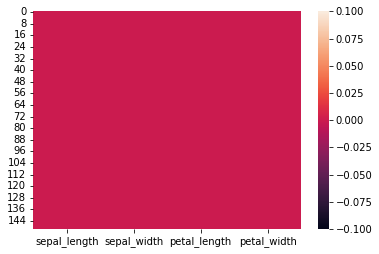

In [75]:
import seaborn as sns
sns.heatmap(features.isna())

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3)

**Exercise 1**: Apply PCA on Iris dataset

In [77]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

In [78]:
pca.fit(X_train)

PCA(n_components=3)

In [79]:
X_test_pca = pca.fit_transform(X_test)


In [80]:
columns = X_test.columns.values
# X_test_pca = pd.DataFrame(X_test_pca, columns=columns)
X_test_pca = pd.DataFrame(X_test_pca)


In [81]:
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
112,6.8,3.0,5.5,2.1
81,5.5,2.4,3.7,1.0
63,6.1,2.9,4.7,1.4
15,5.7,4.4,1.5,0.4
25,5.0,3.0,1.6,0.2


In [82]:
X_test_pca.head()

,0,1,2
0,1.999034,0.209280,0.032650
1,-0.394958,-0.595212,-0.280068
2,0.806387,-0.080683,-0.099381
3,-2.497239,1.522281,0.295912
4,-2.687598,0.032943,-0.189273


**Exercise 2**: Apply K-means on Iris dataset

In [83]:
from sklearn.cluster import KMeans

n_clusters = len(labels['species'].unique())
k_means = KMeans(init="k-means++", n_clusters=n_clusters, n_init=10)

k_means.fit(X_train)

KMeans(n_clusters=3)

In [84]:
kmeans_pred = k_means.predict(X_test)
kmeans_pred


array([2, 1, 1, 0, 0, 2, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 2, 0,
       2, 2, 0, 2, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 1, 0, 0, 2, 1, 0, 1, 2,
       1], dtype=int32)

In [85]:
k_means.fit(pca.fit_transform(X_train))
kmeans_pred_pca = k_means.predict(X_test_pca)
kmeans_pred_pca 

array([2, 1, 1, 0, 0, 2, 0, 2, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 1, 1, 1, 0,
       2, 2, 0, 2, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 1, 0, 0, 2, 1, 0, 1, 2,
       1], dtype=int32)

In [86]:
kmeans_out = X_test.copy()
kmeans_out['species'] = y_test
kmeans_out['species_pred'] = kmeans_pred
kmeans_out['species_pca'] = kmeans_pred_pca
kmeans_out.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_pred,species_pca
112,6.8,3.0,5.5,2.1,virginica,2,2
81,5.5,2.4,3.7,1.0,versicolor,1,1
63,6.1,2.9,4.7,1.4,versicolor,1,1
15,5.7,4.4,1.5,0.4,setosa,0,0
25,5.0,3.0,1.6,0.2,setosa,0,0


In [87]:
species_labels = kmeans_out.drop_duplicates(subset=['species_pred']).sort_values( by=['species_pred'], ascending = True)['species'].values
species_labels

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [88]:
kmeans_out['species_pred'] = kmeans_out['species_pred'].apply(lambda x: species_labels[x])
kmeans_out['species_pca'] = kmeans_out['species_pca'].apply(lambda x: species_labels[x])
kmeans_out.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_pred,species_pca
112,6.8,3.0,5.5,2.1,virginica,virginica,virginica
81,5.5,2.4,3.7,1.0,versicolor,versicolor,versicolor
63,6.1,2.9,4.7,1.4,versicolor,versicolor,versicolor
15,5.7,4.4,1.5,0.4,setosa,setosa,setosa
25,5.0,3.0,1.6,0.2,setosa,setosa,setosa


In [89]:
kmeans_err = kmeans_out[kmeans_out['species']!=kmeans_out['species_pred']]
display(kmeans_err.head())
print('wrong predictions',len(kmeans_err))

,sepal_length,sepal_width,petal_length,petal_width,species,species_pred,species_pca
114,5.8,2.8,5.1,2.4,virginica,versicolor,versicolor
142,5.8,2.7,5.1,1.9,virginica,versicolor,versicolor
146,6.3,2.5,5.0,1.9,virginica,versicolor,versicolor


wrong predictions 3


In [90]:
kmeans_err_pca = kmeans_out[kmeans_out['species']!=kmeans_out['species_pca']]
print('wrong prediction with pca',len(kmeans_err))
display(kmeans_err_pca.head())

wrong prediction with pca 3


,sepal_length,sepal_width,petal_length,petal_width,species,species_pred,species_pca
114,5.8,2.8,5.1,2.4,virginica,versicolor,versicolor
142,5.8,2.7,5.1,1.9,virginica,versicolor,versicolor
93,5.0,2.3,3.3,1.0,versicolor,versicolor,setosa
98,5.1,2.5,3.0,1.1,versicolor,versicolor,setosa
57,4.9,2.4,3.3,1.0,versicolor,versicolor,setosa


In [91]:
err_index_1 = np.array(kmeans_err.index)
err_index_2 = np.array(kmeans_err_pca.index)
err_index = np.concatenate((err_index_1,err_index_2),axis=0)

index_diff = np.intersect1d(err_index_1,err_index_2)
index_diff

array([114, 142, 146])

In [92]:
kmeans_final_err = kmeans_out[kmeans_out.index.isin(index_diff)]
kmeans_final_err

,sepal_length,sepal_width,petal_length,petal_width,species,species_pred,species_pca
114,5.8,2.8,5.1,2.4,virginica,versicolor,versicolor
142,5.8,2.7,5.1,1.9,virginica,versicolor,versicolor
146,6.3,2.5,5.0,1.9,virginica,versicolor,versicolor


In [93]:
print('accuracy from pandas:',1 - len(kmeans_err) / len(kmeans_out))
print('accuracy from pandas (pca col.):',1 - len(kmeans_err_pca) / len(kmeans_out))
print('accuracy from pandas (combined) :',1 - len(kmeans_final_err) / len(kmeans_out))

accuracy from pandas: 0.9333333333333333
accuracy from pandas (pca col.): 0.8444444444444444
accuracy from pandas (combined) : 0.9333333333333333


In [94]:

from sklearn.metrics import accuracy_score
print('accuracy verifying:')
print('accuracy from sklearn',accuracy_score(y_test,kmeans_out['species_pred']))
print('accuracy from sklearn on pca col.',accuracy_score(y_test,kmeans_out['species_pca']))

accuracy verifying:
accuracy from sklearn 0.9333333333333333
accuracy from sklearn on pca col. 0.8444444444444444


**Exercise 3**: Apply Gradient boosting on Iris dataset

In [95]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [96]:
gbc.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [97]:
gbc_pred = gbc.predict(X_test)

In [98]:
gbc_pred

array(['virginica', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'setosa', 'virginica', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor'],
      dtype=object)

In [99]:
gbc.fit(pca.fit_transform(X_train),y_train)
gbc_pred_pca = gbc.predict(pca.fit_transform(X_test))
gbc_pred_pca 

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['virginica', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor'],
      dtype=object)

In [100]:
gbc_out = X_test.copy()
gbc_out['species'] = y_test
gbc_out['species_pred'] = gbc_pred
gbc_out['species_pca'] = gbc_pred_pca
gbc_out.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_pred,species_pca
112,6.8,3.0,5.5,2.1,virginica,virginica,virginica
81,5.5,2.4,3.7,1.0,versicolor,versicolor,versicolor
63,6.1,2.9,4.7,1.4,versicolor,versicolor,versicolor
15,5.7,4.4,1.5,0.4,setosa,setosa,setosa
25,5.0,3.0,1.6,0.2,setosa,setosa,setosa


In [101]:
gbc_err = gbc_out[gbc_out['species'] != gbc_out['species_pred']]
display(gbc_err.head())
print(len(gbc_err))

,sepal_length,sepal_width,petal_length,petal_width,species,species_pred,species_pca
52,6.9,3.1,4.9,1.5,versicolor,virginica,versicolor
72,6.3,2.5,4.9,1.5,versicolor,virginica,versicolor


2


In [102]:
gbc_err_pca = gbc_out[gbc_out['species'] != gbc_out['species_pca']]
display(gbc_err_pca.head())
print(len(gbc_err_pca))

,sepal_length,sepal_width,petal_length,petal_width,species,species_pred,species_pca
147,6.5,3.0,5.2,2.0,virginica,virginica,versicolor


1


In [103]:
err_index_1 = np.array(gbc_err.index)
err_index_2 = np.array(gbc_err_pca.index)
err_index = np.concatenate((err_index_1,err_index_2),axis=0)

index_diff = np.intersect1d(err_index_1,err_index_2)
index_diff

array([], dtype=int64)

In [104]:
gbc_final_err = gbc_out[gbc_out.index.isin(index_diff)]
gbc_final_err

,sepal_length,sepal_width,petal_length,petal_width,species,species_pred,species_pca


In [105]:
print('gbc accuracy', 1 - (len(gbc_err) / len(gbc_out)))
print('gbc accuracy from pca col.', 1 - len(gbc_err_pca) / len(gbc_out))
print('gbc combined accuracy',1 - len(gbc_final_err) / len(gbc_out))

gbc accuracy 0.9555555555555556
gbc accuracy from pca col. 0.9777777777777777
gbc combined accuracy 1.0


**Exercise 4**: Apply XGBoost on Iris dataset

In [106]:
import xgboost as xgb
# dir(xgb)

In [107]:
xgb_model = xgb.XGBClassifier(base_score=0.3, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [108]:
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.3, max_depth=10, nthread=-1,
              objective='multi:softprob', seed=0, silent=True)

In [109]:
xgb_pred = xgb_model.predict(X_test)

In [110]:
xgb_pred

array(['virginica', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'setosa', 'virginica', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor'],
      dtype=object)

In [111]:
xgb_model.fit(pca.fit_transform(X_train),y_train)
xgb_pred_pca = xgb_model.predict(pca.fit_transform(X_test))
xgb_pred_pca 

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['virginica', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'virginica',
       'setosa', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'versicolor'], dtype=object)

In [112]:
xgb_out = X_test.copy()
xgb_out['species'] = y_test
xgb_out['species_pred'] = xgb_pred
xgb_out['species_pca'] = xgb_pred_pca
xgb_out.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_pred,species_pca
112,6.8,3.0,5.5,2.1,virginica,virginica,virginica
81,5.5,2.4,3.7,1.0,versicolor,versicolor,versicolor
63,6.1,2.9,4.7,1.4,versicolor,versicolor,versicolor
15,5.7,4.4,1.5,0.4,setosa,setosa,setosa
25,5.0,3.0,1.6,0.2,setosa,setosa,setosa


In [134]:
xgb_err = xgb_out[gbc_out['species'] != xgb_out['species_pred']]
display(xgb_err.head())
print(len(xgb_err))

,sepal_length,sepal_width,petal_length,petal_width,species,species_pred,species_pca
52,6.9,3.1,4.9,1.5,versicolor,virginica,versicolor
72,6.3,2.5,4.9,1.5,versicolor,virginica,versicolor


2


In [135]:
xgb_err_pca = xgb_out[xgb_out['species'] != xgb_out['species_pca']]
display(xgb_err_pca.head())
print(len(xgb_err_pca))

,sepal_length,sepal_width,petal_length,petal_width,species,species_pred,species_pca
146,6.3,2.5,5.0,1.9,virginica,virginica,versicolor


1


In [115]:
err_index_1 = np.array(xgb_err.index)
err_index_2 = np.array(xgb_err_pca.index)
err_index = np.concatenate((err_index_1,err_index_2),axis=0)

index_diff = np.intersect1d(err_index_1,err_index_2)
index_diff

array([], dtype=int64)

In [116]:
xgb_final_err = xgb_out[xgb_out.index.isin(index_diff)]
xgb_final_err

,sepal_length,sepal_width,petal_length,petal_width,species,species_pred,species_pca


In [117]:
print('xgb accuracy', 1 - len(xgb_err) / len(xgb_out))
print('xgb accuracy from pca col.', 1 - len(xgb_err_pca) / len(xgb_out))
print('xgb combined accuracy ',1 - len(xgb_final_err) / len(xgb_out))

xgb accuracy 0.9555555555555556
xgb accuracy from pca col. 0.9777777777777777
xgb combined accuracy  1.0


**Exercise 5**: Find accuracy score for all the algorithms mentioned above and compare them

In [118]:
print('kmeans accuracy:',1 - len(kmeans_err) / len(kmeans_out))
print('gbc accuracy', 1 - len(gbc_err) / len(gbc_out))
print('xgb accuracy', 1 - len(xgb_err) / len(xgb_out))

kmeans accuracy: 0.9333333333333333
gbc accuracy 0.9555555555555556
xgb accuracy 0.9555555555555556


**Exercise 6**: Find classification report score for all the algorithms  mentioned above and compare them

In [119]:
from sklearn.metrics import classification_report
print(classification_report(kmeans_out['species'], kmeans_out['species_pred'], target_names=y_test['species'].unique()))

              precision    recall  f1-score   support

   virginica       1.00      1.00      1.00        12
  versicolor       0.85      1.00      0.92        17
      setosa       1.00      0.81      0.90        16

    accuracy                           0.93        45
   macro avg       0.95      0.94      0.94        45
weighted avg       0.94      0.93      0.93        45



In [120]:
print(classification_report(gbc_out['species'], gbc_out['species_pred'], target_names=y_test['species'].unique()))

              precision    recall  f1-score   support

   virginica       1.00      1.00      1.00        12
  versicolor       1.00      0.88      0.94        17
      setosa       0.89      1.00      0.94        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [121]:
print(classification_report(xgb_out['species'], xgb_out['species_pred'], target_names=y_test['species'].unique()))

              precision    recall  f1-score   support

   virginica       1.00      1.00      1.00        12
  versicolor       1.00      0.88      0.94        17
      setosa       0.89      1.00      0.94        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



**Exercise 7**: Find confusion matrix for all the classification algorithms mentioned above and compare them

In [122]:
from sklearn.metrics import confusion_matrix
labels = y_train['species'].unique()

In [123]:
expected = kmeans_out['species_pred'].to_numpy()
actual = kmeans_out['species'].to_numpy()

cm=confusion_matrix(actual,expected)

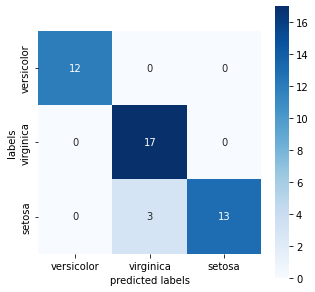

In [124]:
plt.figure(figsize=[5, 5])
sns.heatmap(data=cm, annot=True, cmap='Blues', square=True, xticklabels=labels, yticklabels=labels)
plt.ylabel('labels')
plt.xlabel('predicted labels')
plt.show()

In [125]:
expected = gbc_out['species_pred'].to_numpy()
actual = gbc_out['species'].to_numpy()

cm=confusion_matrix(actual,expected)

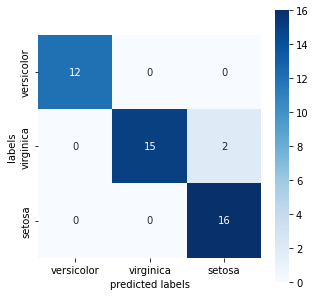

In [126]:
plt.figure(figsize=[5, 5])
sns.heatmap(data=cm, annot=True, cmap='Blues', square=True, xticklabels=labels, yticklabels=labels)
plt.ylabel('labels')
plt.xlabel('predicted labels')
plt.show()

In [127]:
expected = xgb_out['species_pred'].to_numpy()
actual = xgb_out['species'].to_numpy()

cm=confusion_matrix(actual,expected)

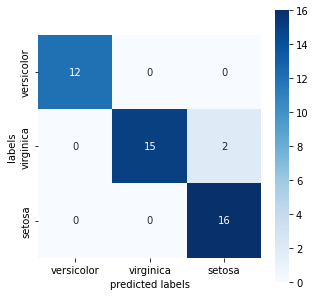

In [128]:
plt.figure(figsize=[5, 5])
sns.heatmap(data=cm, annot=True, cmap='Blues', square=True, xticklabels=labels, yticklabels=labels)
plt.ylabel('labels')
plt.xlabel('predicted labels')
plt.show()

**Exercise 8**: Find MSE - mean squared error and MAE - mean absolute error, R2 score for the regression algorithms mentioned above and compare them

In [129]:
print('not applicable')

not applicable


**Exercise 9**: Find adjusted rand index for all the algorithms.
See: https://www.sciencedirect.com/topics/computer-science/adjusted-rand-index#:~:text=The%20Adjusted%20Rand%20score%20is,identified%20within%20the%20same%20cluster.

In [130]:
from sklearn.metrics.cluster import adjusted_rand_score
print(adjusted_rand_score(kmeans_out['species'],kmeans_out['species_pred']))
print(adjusted_rand_score(gbc_out['species'],gbc_out['species_pred']))
print(adjusted_rand_score(xgb_out['species'],xgb_out['species_pred']))

0.7948630578527619
0.8575486673907594
0.8575486673907594


**Exercise 10**: Find Homogenity for all the algorithms. See: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html#:~:text=homogeneity_score,-sklearn.metrics.&text=Homogeneity%20metric%20of%20a%20cluster,members%20of%20a%20single%20class.

In [131]:
from sklearn.metrics import homogeneity_score
print(homogeneity_score(kmeans_out['species'],kmeans_out['species_pred']))
print(homogeneity_score(gbc_out['species'],gbc_out['species_pred']))
print(homogeneity_score(xgb_out['species'],xgb_out['species_pred']))

0.8273066801912896
0.8717395083704689
0.8717395083704689


**Exercise 11**: Find V-measure for all the algorithms. See: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html

In [132]:
from sklearn.metrics import v_measure_score
print(v_measure_score(kmeans_out['species'],kmeans_out['species_pred']))
print(v_measure_score(gbc_out['species'],gbc_out['species_pred']))
print(v_measure_score(xgb_out['species'],xgb_out['species_pred']))

0.8335465085772037
0.8728217193782314
0.8728217193782314


# References
https://www.w3resource.com/machine-learning/scikit-learn/iris/index.php